In [50]:
# numpy has built in random function, so no need to import random on its own
import random
import numpy as np
import pandas as pd
from scipy.stats import linregress
import matplotlib.pyplot as plt
from config import g_key
import gmaps

In [51]:
# generates a single point float between 0.0 and 1.0
random.random()

0.7691009691347432

In [52]:
random.randint(-10,10)

-7

In [53]:
random.randrange(-9,9,3)

-6

In [54]:
random.uniform(-10,10)

5.65061789238432

In [55]:
# combine to create latitude
random_latitude = random.random() + random.randint(-90, 89)
random_latitude

30.322698363935025

In [56]:
# create a while loop to collect a set number of randomly generated latitutdes
latitudes = []
x = 1
while x < 11:
    random_lat = random.random() + random.randint(-90, 89)
    latitudes.append(random_lat)
    x += 1

In [57]:
latitudes

[-22.594196212991996,
 41.83926032405472,
 39.55586592625974,
 58.168905509733726,
 44.03560874237905,
 -78.93288454145143,
 66.32159530212058,
 30.097196248144332,
 -72.37724736209692,
 74.65175570253513]

In [58]:
# create a while loop to collect a set number of randomly generated longitudes
longitudes = []
x = 1
while x < 11:
    random_long = random.random() + random.randint(-90, 89)
    longitudes.append(random_long)
    x += 1


In [59]:
longitudes

[8.13619414789843,
 25.293258739413698,
 7.848580314699184,
 30.642781609888658,
 45.769266125642154,
 2.9481147890122683,
 55.94826260233428,
 50.41290184354607,
 66.68283412789364,
 50.96148987205388]

In [60]:
# generate lang/long using random.uniform()
np.random.uniform(-90.000, 90.000, size = 50)

array([-84.85781286, -43.71790488,  44.39454457,  80.84580714,
        13.18486461,  84.59217208,  39.59424135,   6.64771044,
        78.03171535, -48.93424895, -59.25334351, -21.46300489,
        -3.27938979,  55.94530402,   1.45188324,  63.5332396 ,
        88.64162091, -85.50188955,  45.52578371, -10.32627666,
        77.89392081, -59.46528953,  33.76125108, -71.23047888,
       -58.9654896 ,  84.75762333,  71.91352279,   5.60808982,
        18.04938497, -28.38183713,  59.38003542,  76.44183453,
        12.45961414,  35.73737882,  70.96887016, -52.45765749,
         2.03549416, -36.20171351,  72.81881238,  63.34739359,
        48.58984158, -55.00090426,  78.32622245, -28.02294801,
       -76.40906774,  80.34111695, -86.57472236,  70.39389129,
        81.67344264,  88.45180406])

In [61]:
import timeit

In [62]:
%timeit np.random.uniform(-90.000, 90.000, size = 1500)

17 µs ± 37.5 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [63]:
def latitudes(size):
    latitudes = []
    x = 0
    while x < (size):
        random_lat = random.randint(-90, 90) + random.random()
        latitudes.append(random_lat)
        x += 1
    return latitudes
# time the function with 1500.
%timeit latitudes(1500)

1.61 ms ± 6.8 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [64]:
# Create an equal number of latitudes and temperatures.
lats = [42.5, 43.9, 8.1, 36.8, 79.9, 69.1, 25.7, 15.3, 12.7, 64.5]
temps = [80.5, 75.3, 90.9, 90.0, 40.4, 62.3, 85.4, 79.6, 72.5, 72.0]

In [65]:
# use linregress to calculate linear regression
(slope, intercept, r_value, p_value, std_err) = linregress(lats, temps)
# Get the equation of the line.
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
print(f"The p-value is: {p_value:.3f}")

y = -0.45x + 92.94
The p-value is: 0.011


In [66]:
# calculate regression line from slope and intercept
regress_values = [(lat * slope + intercept) for lat in lats]

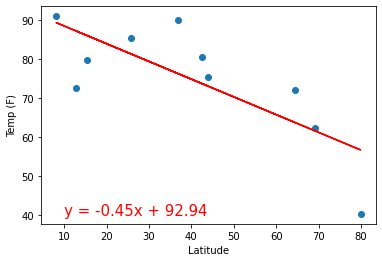

In [67]:
plt.scatter(lats, temps)
# plot the regression line with x-values and y coord based on slope and intercept
plt.plot(lats, regress_values, "r")
# format
plt.annotate(line_eq,(10,40), fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Temp (F)")
plt.show()

In [68]:
city_data_df = pd.read_csv("weather_data/cities.csv")
city_data_df.head(10)

,City ID,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,0,Saskylakh,RU,2022-05-04 17:46:57,71.9167,114.0833,22.01,91,100,6.17
1,1,Kavieng,PG,2022-05-04 17:46:57,-2.5744,150.7967,82.49,77,75,10.92
2,2,Khatanga,RU,2022-05-04 17:46:58,71.9667,102.5000,1.54,100,97,2.75
3,3,Severo-Kurilsk,RU,2022-05-04 17:46:59,50.6789,156.1250,33.49,87,97,3.76
4,4,Dingle,PH,2022-05-04 17:46:59,10.9995,122.6711,77.40,82,80,7.36
5,5,Roma,US,2022-05-04 17:47:00,43.2128,-75.4557,55.72,96,100,8.05
6,6,Jamestown,US,2022-05-04 17:45:09,42.0970,-79.2353,53.53,94,100,10.36
7,7,Saldanha,ZA,2022-05-04 17:47:00,-33.0117,17.9442,64.45,92,66,9.22
8,8,Buraydah,SA,2022-05-04 17:47:01,26.3260,43.9750,97.25,12,31,8.03
9,9,Hobart,AU,2022-05-04 17:47:02,-42.8794,147.3294,43.05,90,72,9.22


In [71]:
city_data_df.dtypes

City ID         int64
City           object
Country        object
Date           object
Lat           float64
Lng           float64
Max Temp      float64
Humidity        int64
Cloudiness      int64
Wind Speed    float64
dtype: object

In [72]:
# configure gmaps to use API key
gmaps.configure(api_key=g_key)

In [90]:
# Heatmap of temperature
# Get the latitude and longitude.
locations = city_data_df[["Lat", "Lng"]]
# Get the maximum temperature.
max_temps = city_data_df["Max Temp"]
# Assign the figure variable.
fig = gmaps.figure(center=(30.0, 15.0),zoom_level=1.5)
# Assign the heatmap variable.
heat_layer = gmaps.heatmap_layer(locations, weights=[max(temp, 0) for temp in max_temps], 
                                 dissipating=False, max_intensity=100, point_radius=3)
# Add the heatmap layer.
fig.add_layer(heat_layer)
# Call the figure to plot the data.
fig

Figure(layout=FigureLayout(height='420px'))

In [91]:
# % humidity heatmap
# Get the latitude and longitude.
locations = city_data_df[["Lat", "Lng"]]
# Get the % humidity
humid = city_data_df["Humidity"]
# Assign the figure variable.
fig = gmaps.figure(center=(30.0, 15.0),zoom_level=1.5)
# Assign the heatmap variable.
heat_layer = gmaps.heatmap_layer(locations, weights=humid, 
                                 dissipating=False, max_intensity=100, point_radius=3)
# Add the heatmap layer.
fig.add_layer(heat_layer)
# Call the figure to plot the data.
fig

Figure(layout=FigureLayout(height='420px'))

In [92]:
# cloudiness map
# Get the latitude and longitude.
locations = city_data_df[["Lat", "Lng"]]
# Get the % clouds
clouds = city_data_df["Cloudiness"]
# Assign the figure variable.
fig = gmaps.figure(center=(30.0, 15.0),zoom_level=1.5)
# Assign the heatmap variable.
heat_layer = gmaps.heatmap_layer(locations, weights=clouds, 
                                 dissipating=False, max_intensity=100, point_radius=3)
# Add the heatmap layer.
fig.add_layer(heat_layer)
# Call the figure to plot the data.
fig

Figure(layout=FigureLayout(height='420px'))

In [93]:
# windspeed map
# Get the latitude and longitude.
locations = city_data_df[["Lat", "Lng"]]
# Get the % humidity
wind = city_data_df["Wind Speed"]
# Assign the figure variable.
fig = gmaps.figure(center=(30.0, 15.0),zoom_level=1.5)
# Assign the heatmap variable.
heat_layer = gmaps.heatmap_layer(locations, weights=wind, 
                                 dissipating=False, max_intensity=100, point_radius=4)
# Add the heatmap layer.
fig.add_layer(heat_layer)
# Call the figure to plot the data.
fig

Figure(layout=FigureLayout(height='420px'))

In [94]:
# create input for vacationers to select temp ranges for possible destinations
# Ask the vacationer to add a minimum and maximum temperature value.
min_temp = float(input("What is the minimum temperature you would like for your trip? "))
max_temp = float(input("What is the maximum temperature you would like for your trip? "))

What is the minimum temperature you would like for your trip? 70
What is the maximum temperature you would like for your trip? 85


In [98]:
# filter data based on input and drop nulls
preferred_cities_df = city_data_df.loc[(city_data_df["Max Temp"] <= max_temp) & \
                                      (city_data_df["Max Temp"] >= min_temp)].dropna()
preferred_cities_df.head(10)

,City ID,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,1,Kavieng,PG,2022-05-04 17:46:57,-2.5744,150.7967,82.49,77,75,10.92
4,4,Dingle,PH,2022-05-04 17:46:59,10.9995,122.6711,77.40,82,80,7.36
10,10,Caucaia,BR,2022-05-04 17:47:02,-3.7361,-38.6531,84.15,72,75,12.66
11,11,Souillac,MU,2022-05-04 17:47:03,-20.5167,57.5167,79.18,78,40,16.11
12,12,Salinopolis,BR,2022-05-04 17:47:03,-0.6136,-47.3561,81.45,79,73,6.76
17,17,Atuona,PF,2022-05-04 17:47:06,-9.8000,-139.0333,79.23,72,81,15.79
23,23,Mahina,PF,2022-05-04 17:47:09,-17.5065,-149.4890,80.37,78,75,6.91
26,26,Merauke,ID,2022-05-04 17:47:10,-8.4667,140.3333,77.56,85,83,11.34
30,30,Sao Filipe,CV,2022-05-04 17:47:12,14.8961,-24.4956,73.18,79,3,9.62
33,33,Rikitea,PF,2022-05-04 17:47:13,-23.1203,-134.9692,77.20,84,70,20.00


In [99]:
preferred_cities_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 163 entries, 1 to 538
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City ID     163 non-null    int64  
 1   City        163 non-null    object 
 2   Country     163 non-null    object 
 3   Date        163 non-null    object 
 4   Lat         163 non-null    float64
 5   Lng         163 non-null    float64
 6   Max Temp    163 non-null    float64
 7   Humidity    163 non-null    int64  
 8   Cloudiness  163 non-null    int64  
 9   Wind Speed  163 non-null    float64
dtypes: float64(4), int64(3), object(3)
memory usage: 14.0+ KB


In [100]:
# get hotels from df with API call
hotel_df = preferred_cities_df[["City", "Country", "Max Temp", "Lat","Lng"]].copy()
hotel_df["Hotel Name"]=""
hotel_df.head(10)

,City,Country,Max Temp,Lat,Lng,Hotel Name
1,Kavieng,PG,82.49,-2.5744,150.7967,
4,Dingle,PH,77.40,10.9995,122.6711,
10,Caucaia,BR,84.15,-3.7361,-38.6531,
11,Souillac,MU,79.18,-20.5167,57.5167,
12,Salinopolis,BR,81.45,-0.6136,-47.3561,
17,Atuona,PF,79.23,-9.8000,-139.0333,
23,Mahina,PF,80.37,-17.5065,-149.4890,
26,Merauke,ID,77.56,-8.4667,140.3333,
30,Sao Filipe,CV,73.18,14.8961,-24.4956,
33,Rikitea,PF,77.20,-23.1203,-134.9692,


In [106]:
import requests

In [108]:
# Set the parameters to search for a hotel in Paris.
params = {
    "radius": 5000,
    "types": "lodging",
    "key": g_key,
    "location": "48.8566, 2.3522"}
# Use base URL to search for hotels in Paris.
base_url = "https://maps.googleapis.com/maps/api/place/nearbysearch/json"
# Make request and get the JSON data from the search.
hotels = requests.get(base_url, params=params).json()

hotels

{'html_attributions': [],
 'next_page_token': 'Aap_uEBFzXFVfnVXfb09UFMaMiPtjwtVGVZL3vpCdQmlIXaM2PenRY6zXjic2p-NcUcayqvzVyRpNnQ6yM5bw39GvlEvcD-Vu1UfLW1zyFzrTdVcEndqF9-JF9fxrZBEb_Y3WtQnmH8U9fRkOMW4MeMb67y77Cy61YXha_Rls0oDmPvf4044NBoRG_Z6h2M8OvJnXchMFFXuf0EsFsnSFD8aJtHnxo8RjZtB1uIn82tNRWYI9bJt3xOMGhGkMLsjZDm1l7bWQ4VAZRwPqJEPwl7JkluEwM8SZemtcuglvpZljfnQ6IA1K2ufCJvugh9e69FqNL3ohofiNBLRHIpCMe3zJT1vAPpYOPsAeZ66tceBcxh4tGJR5A0NdzZRZoZ6t8mncKMaLDbVQdco9BzlqeGQvn9jHtieen8a3sRsbtH4LgRIdtZYkvFf5YR8',
 'results': [{'business_status': 'OPERATIONAL',
   'geometry': {'location': {'lat': 48.8581126, 'lng': 2.3529277},
    'viewport': {'northeast': {'lat': 48.8594360302915,
      'lng': 2.354355480291502},
     'southwest': {'lat': 48.8567380697085, 'lng': 2.351657519708498}}},
   'icon': 'https://maps.gstatic.com/mapfiles/place_api/icons/v1/png_71/lodging-71.png',
   'icon_background_color': '#909CE1',
   'icon_mask_base_uri': 'https://maps.gstatic.com/mapfiles/place_api/icons/v2/hotel_pinlet',
   'nam

In [110]:
len(hotels["results"])

20

In [121]:
# name of first hotel
hotels["results"][0]["name"]

'Hôtel Duo'

In [138]:
# iterate through hotel dataframe
for index,row in hotel_df.iterrows():
    # get lat and langs
    lat = row["Lat"]
    lng = row["Lng"]
    
    # add them to location key for params dict
    params["location"] = f"{lat},{lng}"
    
    # use search term "lodging" and lat and long
    base_url = "https://maps.googleapis.com/maps/api/place/nearbysearch/json"
    
    # make a request and get the json data
    hotels = requests.get(base_url, params=params).json()
    
    # grab the first hotel from the list and store the name (use try to avoid errors)
    try:
        hotel_df.loc[index, "Hotel Name"] = hotels["results"][0]["name"]
    except (IndexError):
        print("Hotel not found...onward!")

Hotel not found...onward!
Hotel not found...onward!
Hotel not found...onward!
Hotel not found...onward!
Hotel not found...onward!
Hotel not found...onward!
Hotel not found...onward!
Hotel not found...onward!
Hotel not found...onward!


In [139]:
hotel_df.head()

,City,Country,Max Temp,Lat,Lng,Hotel Name
1,Kavieng,PG,82.49,-2.5744,150.7967,Nusa Island Retreat
4,Dingle,PH,77.40,10.9995,122.6711,SEGAYA PROPERTY
10,Caucaia,BR,84.15,-3.7361,-38.6531,M.O.S. Logística - Filial Fortaleza
11,Souillac,MU,79.18,-20.5167,57.5167,Shanti Maurice Resort & Spa
12,Salinopolis,BR,81.45,-0.6136,-47.3561,Salinas Park Resort Maçarico AP101


In [145]:
# Add a heatmap of temperature for the vacation spots and marker for each city.
locations = hotel_df[["Lat", "Lng"]]
max_temp = hotel_df["Max Temp"]
fig = gmaps.figure(center=(30.0, 31.0), zoom_level=1.5)
heat_layer = gmaps.heatmap_layer(locations, weights=max_temp,
             dissipating=False, max_intensity=300, point_radius=4)
markers = gmaps.marker_layer(locations)
fig.add_layer(heat_layer)
fig.add_layer(markers)
# Call the figure to plot the data.
fig

TypeError: 'DataFrame' object is not callable